In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Carga de datos

In [14]:
df = pd.read_csv("../msd_pre.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   title         1000000 non-null  object 
 1   year          1000000 non-null  int64  
 2   popularity    581965 non-null   float64
 3   duration      1000000 non-null  float64
 4   danceability  1000000 non-null  float64
 5   energy        1000000 non-null  float64
 6   key           1000000 non-null  int64  
 7   loudness      1000000 non-null  float64
 8   mode          1000000 non-null  int64  
 9   tempo         1000000 non-null  float64
 10  signature     1000000 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 83.9+ MB


# Drop columnas vacias

In [15]:
df.drop("title", axis=1, inplace=True)
df.drop("energy", axis=1, inplace=True)
df.drop("danceability", axis=1, inplace=True)

df.describe()

,year,popularity,duration,key,loudness,mode,tempo,signature
count,1000000.000000,581965.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1030.325652,0.447789,249.500755,5.321964,-10.124039,0.666408,123.889369,3.593947
std,998.745002,0.373834,126.229636,3.601595,5.197245,0.471496,35.055810,1.221925
min,0.000000,0.000000,0.313020,0.000000,-58.178000,0.000000,0.000000,0.000000
25%,0.000000,0.072594,180.740770,2.000000,-12.672000,0.000000,97.995000,3.000000
50%,1969.000000,0.381671,228.858320,5.000000,-8.963000,1.000000,122.086500,4.000000
75%,2002.000000,0.908936,289.932610,9.000000,-6.386000,1.000000,144.089000,4.000000
max,2011.000000,1.000000,3034.905670,11.000000,4.318000,1.000000,302.300000,7.000000


# Drop valores nulos

In [16]:
df = df[df["tempo"] != 0]
df = df[df["year"] != 0]
df = df[df["popularity"] != 0]
df = df[df["duration"] != 0]

# df['duration'] = df['duration'] * 1000

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305723 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305723 non-null  int64  
 1   popularity  305723 non-null  float64
 2   duration    305723 non-null  float64
 3   key         305723 non-null  int64  
 4   loudness    305723 non-null  float64
 5   mode        305723 non-null  int64  
 6   tempo       305723 non-null  float64
 7   signature   305723 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 21.0 MB


# Análisis
## Matriz de correlación lineal general

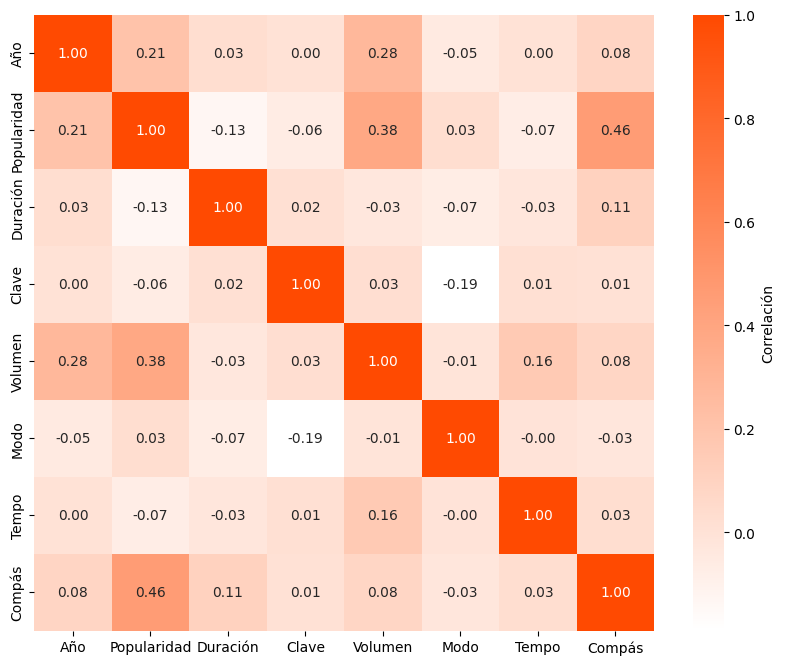

In [17]:
correlation_matrix = df.corr()

columnas_espanol = {
    'year': 'Año',
    'popularity': 'Popularidad',
    'duration': 'Duración',
    'key': 'Clave',
    'loudness': 'Volumen',
    'mode': 'Modo',
    'tempo': 'Tempo',
    'signature': 'Compás'
}

columnas_renombradas = [columnas_espanol.get(col, col) for col in correlation_matrix.columns]

colors = ["#ffffff", "#ff4a01"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f",
            xticklabels=columnas_renombradas, yticklabels=columnas_renombradas,
            cbar_kws={'label': 'Correlación'})

# plt.title("Heatmap de Correlación", fontsize=15)
plt.show()

## Popularidad
### Distribución

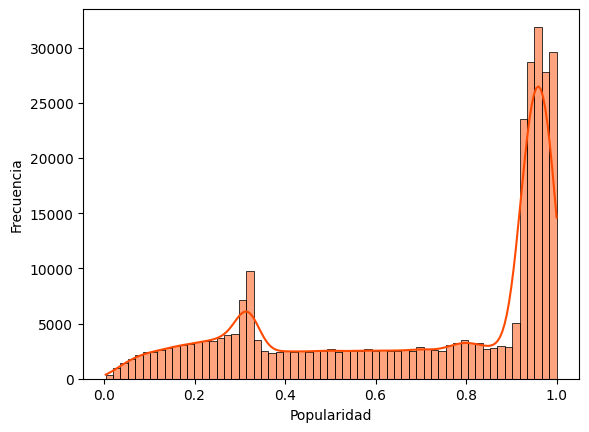

In [18]:
sns.histplot(df['popularity'], kde=True, color="#ff4a01")
# plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

## Año
### Distribución

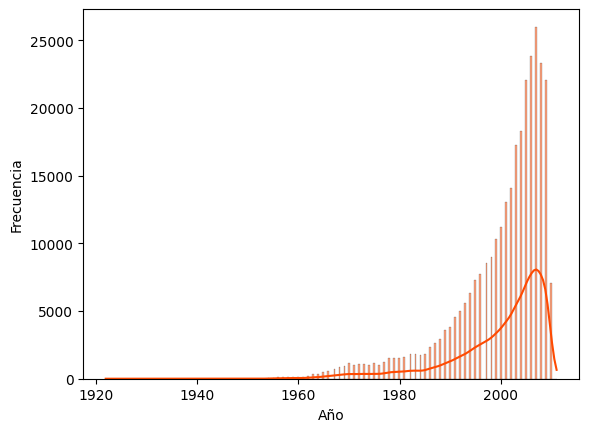

In [19]:
sns.histplot(df['year'], kde=True, color="#ff4a01")
# plt.title('Distribución del Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

### Correlación Lineal

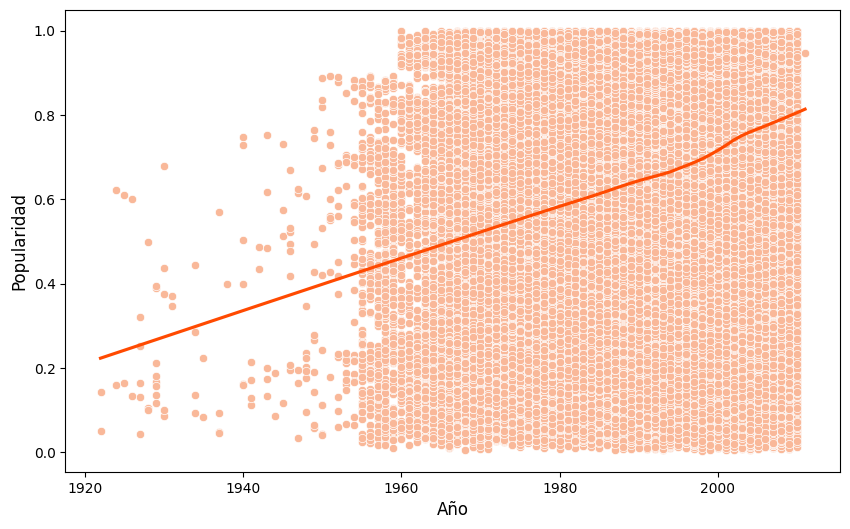

In [20]:
# Crear gráfico de dispersión con curva de tendencia LOWESS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='popularity', data=df, color='#F9B899')

# Añadir una curva de tendencia usando LOWESS (suavizado no lineal)
sns.regplot(x='year', y='popularity', data=df, scatter=False, color='#ff4a01', lowess=True)

# Añadir etiquetas y título
# plt.title('Relación entre Año y Popularidad con Curva de Tendencia', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)

# Mostrar el gráfico
plt.show()

Coeficiente de Pearson

In [21]:
pearson_corr, pearson_p_value = pearsonr(df["year"], df["popularity"])
print(f"Coeficiente de Pearson: {pearson_corr}, p-valor: {pearson_p_value}")

Coeficiente de Pearson: 0.2073379634077316, p-valor: 0.0


## Duración
### Distribución

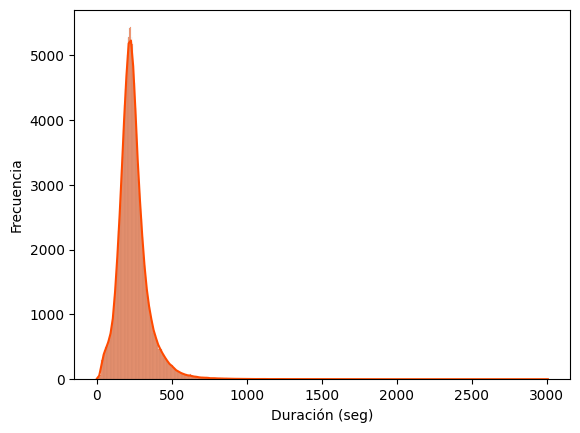

In [22]:
sns.histplot(df['duration'], kde=True, color="#ff4a01")
# plt.title('Distribución de la Duración')
plt.xlabel('Duración (seg)')
plt.ylabel('Frecuencia')
plt.show()

### Correlación cuadrática

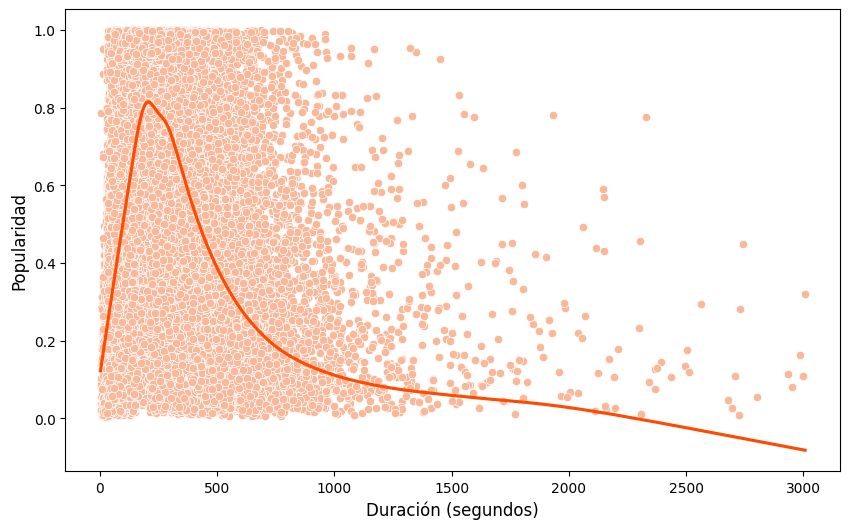

In [23]:
# Crear gráfico de dispersión con curva de tendencia LOWESS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='popularity', data=df, color='#F9B899')

# Añadir una curva de tendencia usando LOWESS (suavizado no lineal)
sns.regplot(x='duration', y='popularity', data=df, scatter=False, color='#ff4a01', lowess=True)

# Añadir etiquetas y título
# plt.title('Relación entre Duración y Popularidad con Curva de Tendencia', fontsize=16)
plt.xlabel('Duración (segundos)', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)

# Mostrar el gráfico
plt.show()

Coeficiente de Spearman

In [24]:
spearman_corr, spearman_p_value = spearmanr(df["duration"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Spearman: -0.07853573892789396, p-valor: 0.0


## Nivel de volumen
### Distribución

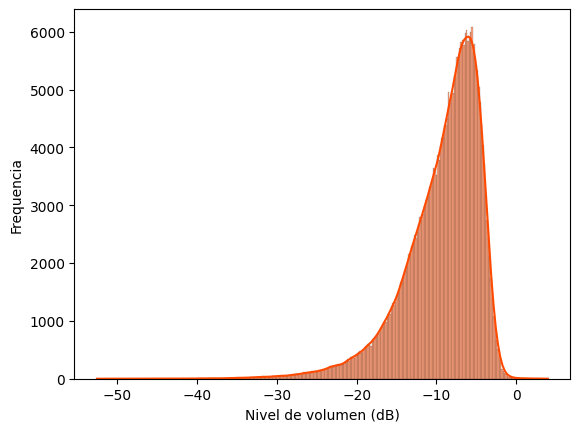

In [25]:
sns.histplot(df['loudness'], kde=True, color="#ff4a01")
# plt.title('Distribución del Ruido')
plt.xlabel('Nivel de volumen (dB)')
plt.ylabel('Frequencia')
plt.show()

### Loudness War

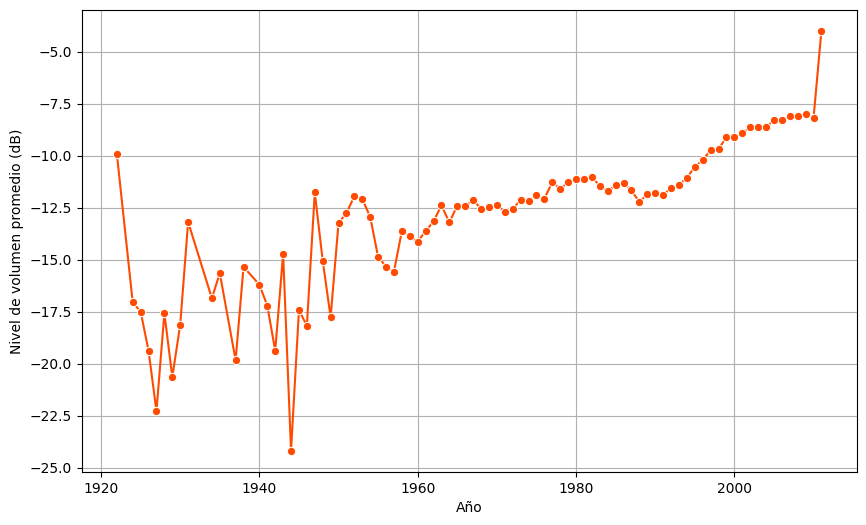

In [26]:
loudness_by_year = df.groupby('year')['loudness'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='loudness', data=loudness_by_year, marker='o', color="#ff4a01")
# plt.title('Evolución del Loudness a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Nivel de volumen promedio (dB)')
plt.grid(True)
plt.show()

### Correlación semilineal

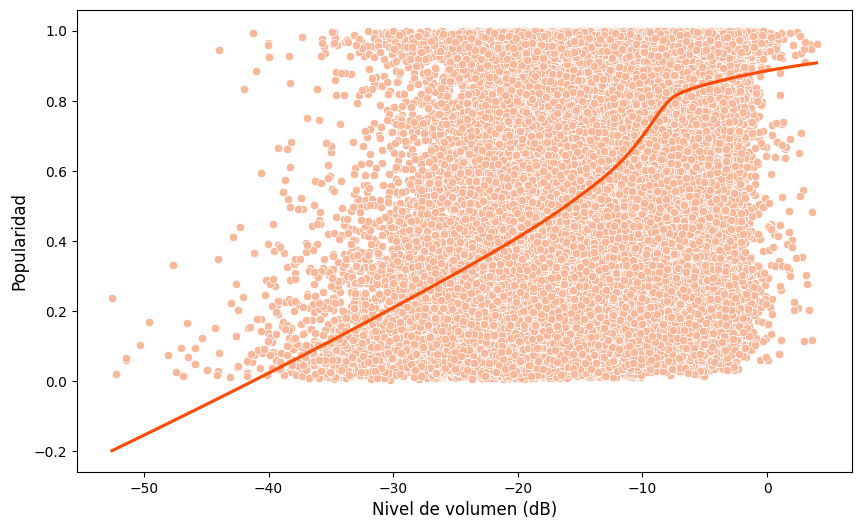

In [27]:
# Crear gráfico de dispersión con curva de tendencia LOWESS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=df, color='#F9B899')

# Añadir una curva de tendencia usando LOWESS (suavizado no lineal)
sns.regplot(x='loudness', y='popularity', data=df, scatter=False, color='#ff4a01', lowess=True)

# Añadir etiquetas y título
# plt.title('Relación entre Duración y Popularidad con Curva de Tendencia', fontsize=16)
plt.xlabel('Nivel de volumen (dB)', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)

# Mostrar el gráfico
plt.show()

Coeficiente de Pearson

In [41]:
pearson_corr, pearson_p_value = pearsonr(df["loudness"], df["popularity"])
print(f"Coeficiente de Pearson: {pearson_corr}, p-valor: {pearson_p_value}")

spearman_corr, spearman_p_value = spearmanr(df["loudness"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Pearson: 0.3832387206735906, p-valor: 0.0
Coeficiente de Spearman: 0.35983265843522044, p-valor: 0.0


## Tempo
### Distribución

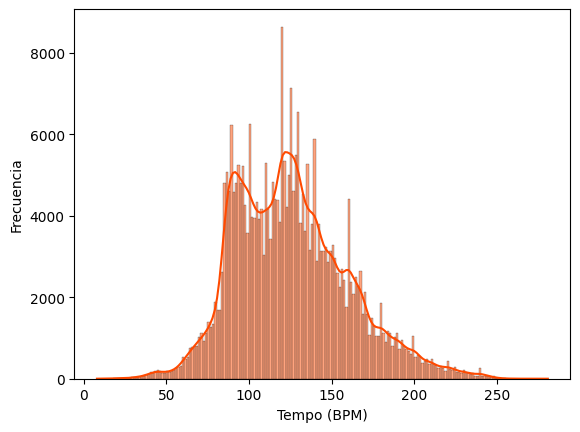

In [29]:
sns.histplot(df['tempo'], kde=True, color="#ff4a01")
# plt.title('Distribución del Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frecuencia')
plt.show()

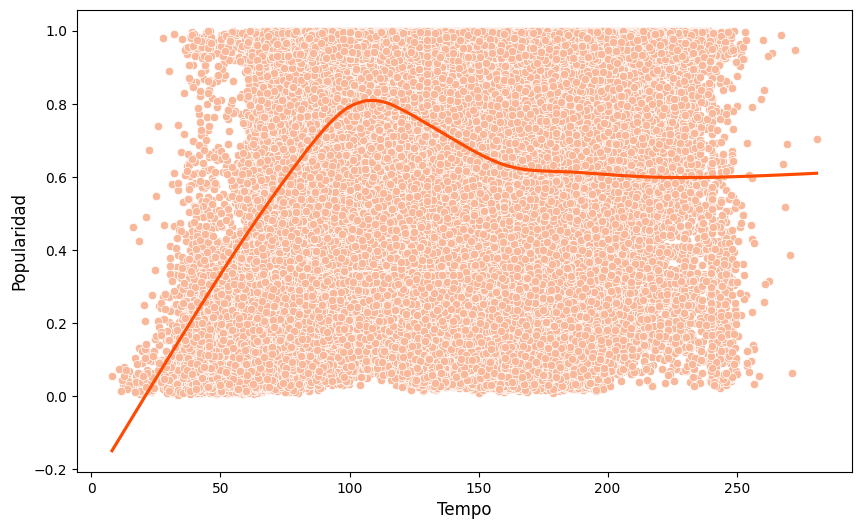

In [30]:
# Crear gráfico de dispersión con curva de tendencia LOWESS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=df, color='#F9B899')

# Añadir una curva de tendencia usando LOWESS (suavizado no lineal)
sns.regplot(x='tempo', y='popularity', data=df, scatter=False, color='#ff4a01', lowess=True)

# Añadir etiquetas y título
# plt.title('Relación entre Tempo y Popularidad con Curva de Tendencia', fontsize=16)
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)

# Mostrar el gráfico
plt.show()

Coeficiente de Spearman

In [31]:
spearman_corr, spearman_p_value = spearmanr(df["tempo"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Spearman: -0.09834990438503344, p-valor: 0.0


## Clave
### Distribución

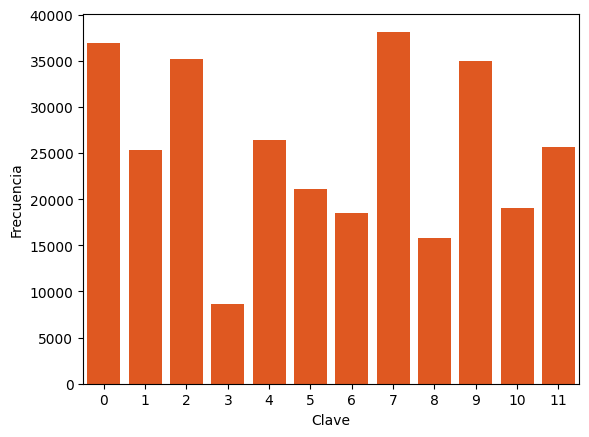

In [32]:
sns.countplot(x=df['key'], color="#ff4a01")
# plt.title('Distribución de la Clave')
plt.xlabel('Clave')
plt.ylabel('Frecuencia')
plt.show()

### Correlación

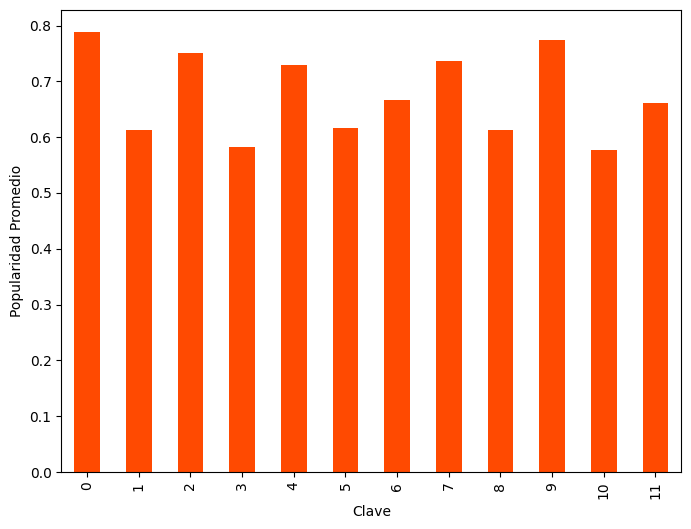

In [33]:
avg_popularity_by_signature = df.groupby('key')['popularity'].mean()

avg_popularity_by_signature.plot(kind='bar', color='#ff4a01', figsize=(8, 6))
plt.xlabel("Clave")
plt.ylabel("Popularidad Promedio")
plt.show()

Coeficiente de Spearman

In [34]:
spearman_corr, spearman_p_value = spearmanr(df["key"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Spearman: -0.06857280468812793, p-valor: 0.0


## Modo
### Distribución

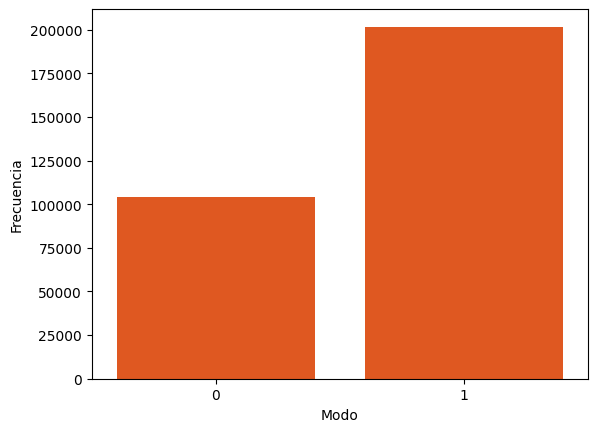

In [35]:
sns.countplot(x=df['mode'], color="#ff4a01")
# plt.title('Distribución del Modo')
plt.xlabel('Modo')
plt.ylabel('Frecuencia')
plt.show()

### Correlación

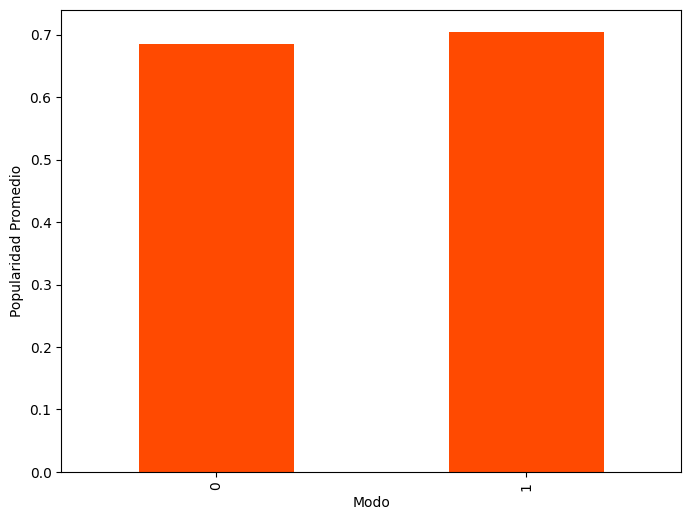

In [36]:
avg_popularity_by_signature = df.groupby('mode')['popularity'].mean()

avg_popularity_by_signature.plot(kind='bar', color='#ff4a01', figsize=(8, 6))
plt.xlabel("Modo")
plt.ylabel("Popularidad Promedio")
plt.show()

Coeficiente de Spearman

In [42]:
pearson_corr, pearson_p_value = pearsonr(df["mode"], df["popularity"])
print(f"Coeficiente de Pearson: {pearson_corr}, p-valor: {pearson_p_value}")

spearman_corr, spearman_p_value = spearmanr(df["mode"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Pearson: 0.029097130271599398, p-valor: 2.912855893414077e-58
Coeficiente de Spearman: 0.03858176113295682, p-valor: 4.770792371940935e-101


## Compas
### DIstribución

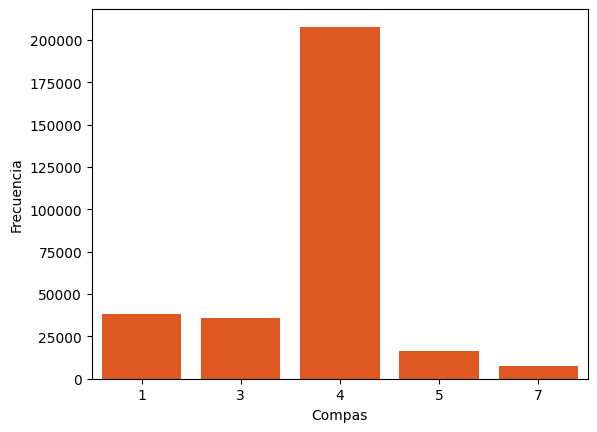

In [38]:
sns.countplot(x=df['signature'], color="#ff4a01")
# plt.title('Distribución del Compas')
plt.xlabel('Compas')
plt.ylabel('Frecuencia')
plt.show()

### Correlación

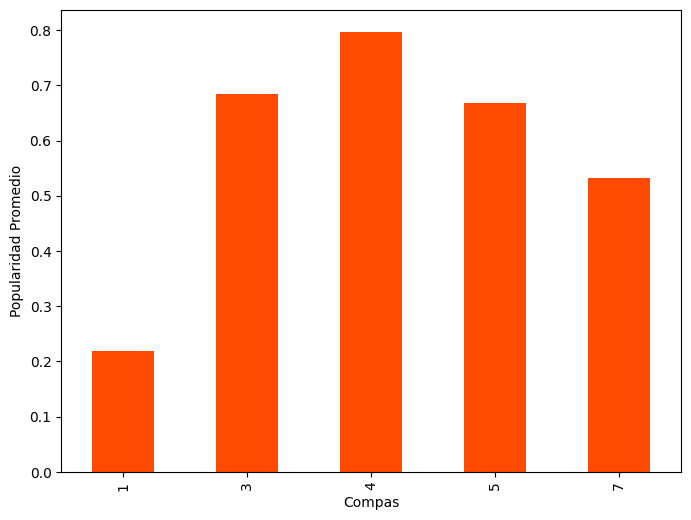

In [39]:
avg_popularity_by_signature = df.groupby('signature')['popularity'].mean()

avg_popularity_by_signature.plot(kind='bar', color='#ff4a01', figsize=(8, 6))
plt.xlabel("Compas")
plt.ylabel("Popularidad Promedio")
plt.show()

Coeficiente de Spearman

In [43]:
pearson_corr, pearson_p_value = pearsonr(df["signature"], df["popularity"])
print(f"Coeficiente de Pearson: {pearson_corr}, p-valor: {pearson_p_value}")

spearman_corr, spearman_p_value = spearmanr(df["signature"], df["popularity"])
print(f"Coeficiente de Spearman: {spearman_corr}, p-valor: {spearman_p_value}")

Coeficiente de Pearson: 0.46077559226613224, p-valor: 0.0
Coeficiente de Spearman: 0.3447028561450236, p-valor: 0.0
